# Code that Computes the Trajectory of an Airborne Object 

This code uses Euler's Method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Constants and Initial Conditions

In [2]:
g = 9.8 #gravity

        #initial velocities cannot be zero

vx0 = 3
vy0 = 5
vz0 = 10

cf = 1e-2
cd = 1e-3
ax0 = -cd*(vx0**2)*0.5*(vx0/abs(vx0))
ay0 = -g + (cf*vy0**2)*0.5-cd*(vy0**2)*0.5*(vy0/abs(vy0))
az0 = -cd*(vz0**2)*0.5*(vz0/abs(vz0))

x0 = 40
y0 = 1e4
z0 = 0

Euler's Method Iterations for x and y

In [3]:
T = 10*60 #30 minutes in seconds
h = 1 #takes steps at each second

thx = np.zeros((T,1))
thy = np.zeros((T,1))
thz = np.zeros((T,1))

ax = np.zeros((T,1))
ax[0] = ax0
ay = np.zeros((T,1))
ay[0] = ay0
az = np.zeros((T,1))
az[0] = az0

vx = np.zeros((T,1))
vx[0] = vx0
vy = np.zeros((T,1))
vy[0] = vy0
vz = np.zeros((T,1))
vz[0] = vz0

x = np.zeros((T,1))
x[0] = x0
y = np.zeros((T,1))
y[0] = y0
z = np.zeros((T,1))
z[0] = z0

for i in range(1,T):
  
   

    
    vx[i] = vx[i-1] + h*ax[i-1]
    vy[i] = vy[i-1] + h*ay[i-1]
    vz[i] = vz[i-1] + h*az[i-1]
    
    x[i] = x[i-1] + h*vx[i-1]
    y[i] = y[i-1] + h*vy[i-1]
    z[i] = z[i-1] + h*vz[i-1]
#     print(y[i])
    print(vx[i])
    ax[i] = -cd*(vx[i]**2)*0.5*(vx[i]/abs(vx[i]))+thx[i]
    print("ax[",i,"]:",ax[i])
    ay[i] = -g + (cf*vy[i]**2)*0.5-cd*(vy[i]**2)*0.5*(vy[i]/abs(vy[i]))+thy[i]
    az[i] = -cd*(vz[i]**2)*0.5*(vz[i]/abs(vz[i]))+thz[i]

    
    if y[i] <= 0:
        y[i] = y[i - 1]
        x[i] = x[i-1]
        z[i] = z[i-1]

[2.9955]
ax[ 1 ]: [-0.00448651]
[2.99101349]
ax[ 2 ]: [-0.00447308]
[2.98654041]
ax[ 3 ]: [-0.00445971]
[2.9820807]
ax[ 4 ]: [-0.0044464]
[2.97763429]
ax[ 5 ]: [-0.00443315]
[2.97320114]
ax[ 6 ]: [-0.00441996]
[2.96878118]
ax[ 7 ]: [-0.00440683]
[2.96437435]
ax[ 8 ]: [-0.00439376]
[2.95998059]
ax[ 9 ]: [-0.00438074]
[2.95559985]
ax[ 10 ]: [-0.00436779]
[2.95123206]
ax[ 11 ]: [-0.00435489]
[2.94687718]
ax[ 12 ]: [-0.00434204]
[2.94253513]
ax[ 13 ]: [-0.00432926]
[2.93820588]
ax[ 14 ]: [-0.00431653]
[2.93388935]
ax[ 15 ]: [-0.00430385]
[2.9295855]
ax[ 16 ]: [-0.00429124]
[2.92529426]
ax[ 17 ]: [-0.00427867]
[2.92101559]
ax[ 18 ]: [-0.00426617]
[2.91674942]
ax[ 19 ]: [-0.00425371]
[2.91249571]
ax[ 20 ]: [-0.00424132]
[2.90825439]
ax[ 21 ]: [-0.00422897]
[2.90402542]
ax[ 22 ]: [-0.00421668]
[2.89980874]
ax[ 23 ]: [-0.00420445]
[2.8956043]
ax[ 24 ]: [-0.00419226]
[2.89141203]
ax[ 25 ]: [-0.00418013]
[2.8872319]
ax[ 26 ]: [-0.00416805]
[2.88306385]
ax[ 27 ]: [-0.00415603]
[2.87890782]
ax[ 28

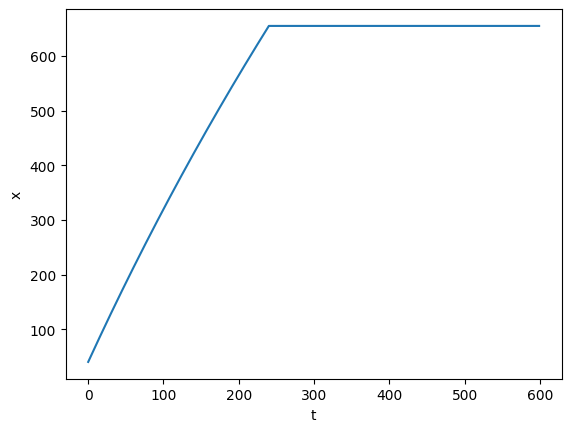

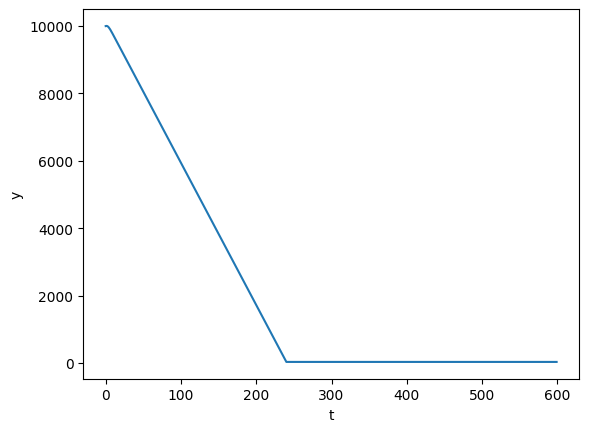

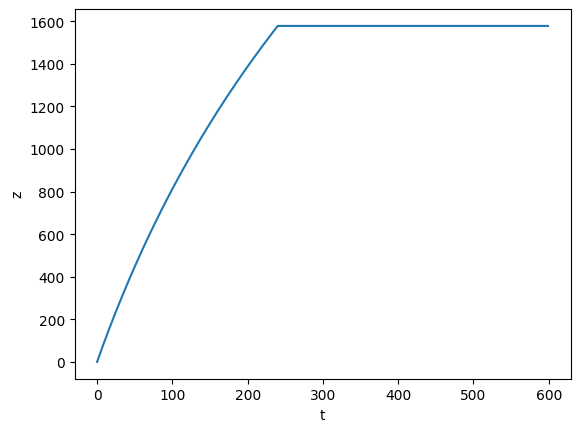

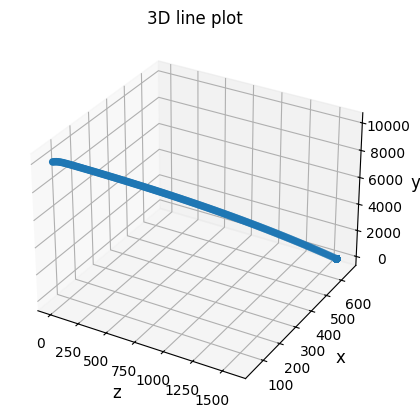

In [4]:
ts = np.arange(0,T,h)

plt.plot(ts, x)
plt.xlabel("t")
plt.ylabel("x")
plt.show()

plt.plot(ts, y)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

plt.plot(ts, z)
plt.xlabel("t")
plt.ylabel("z")
plt.show()
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.scatter(z, x, y, 'green')
ax.set_title('3D line plot')
ax.set_xlabel('z', fontsize=12)
ax.set_ylabel('x', fontsize=12)
ax.set_zlabel('y', fontsize=12)
plt.show()

In [5]:
def convert(miles):
    km = 1.6*miles
    
    return km

In [6]:
kmvalue = convert(7)
print(kmvalue)

11.200000000000001


In [7]:
#A function that predicts the future position of a plane. Time, height, positioning, velocities
#inputs: time in seconds, position(XYZ), velocity(XYZ),
#outputs: position vectors (XYZ, time)
def pred_pos(time, init_pos, init_vel):
    #initial conditions and constants
    g = 9.8 #gravity

        #initial velocities cannot be zero

    vx0 = init_vel[0]
    vy0 = init_vel[1]
    vz0 = init_vel[2]

    cf = 1e-2
    cd = 1e-3
    ax0 = -cd*(vx0**2)*0.5*(vx0/abs(vx0))
    ay0 = -g + (cf*vy0**2)*0.5-cd*(vy0**2)*0.5*(vy0/abs(vy0))
    az0 = -cd*(vz0**2)*0.5*(vz0/abs(vz0))

    x0 = init_pos[0]
    y0 = init_pos[1]
    z0 = init_pos[2]


    T = 10*60 #30 minutes in seconds
    h = 1 #takes steps at each second

    thx = np.zeros((T,1))
    thy = np.zeros((T,1))
    thz = np.zeros((T,1))
    
    ax = np.zeros((T,1))
    ax[0] = ax0
    ay = np.zeros((T,1))
    ay[0] = ay0
    az = np.zeros((T,1))
    az[0] = az0
    
    vx = np.zeros((T,1))
    vx[0] = vx0
    vy = np.zeros((T,1))
    vy[0] = vy0
    vz = np.zeros((T,1))
    vz[0] = vz0
    
    x = np.zeros((T,1))
    x[0] = x0
    y = np.zeros((T,1))
    y[0] = y0
    z = np.zeros((T,1))
    z[0] = z0
    
    for i in range(1,T):
      
    
        vx[i] = vx[i-1] + h*ax[i-1]
        vy[i] = vy[i-1] + h*ay[i-1]
        vz[i] = vz[i-1] + h*az[i-1]
        
        x[i] = x[i-1] + h*vx[i-1]
        y[i] = y[i-1] + h*vy[i-1]
        z[i] = z[i-1] + h*vz[i-1]
        
        ax[i] = -cd*(vx[i]**2)*0.5*(vx[i]/abs(vx[i]))+thx[i]
        ay[i] = -g + (cf*vy[i]**2)*0.5-cd*(vy[i]**2)*0.5*(vy[i]/abs(vy[i]))+thy[i]
        az[i] = -cd*(vz[i]**2)*0.5*(vz[i]/abs(vz[i]))+thz[i]

    
        if y[i] <= 0:
            y[i] = y[i - 1]
            x[i] = x[i-1]
            z[i] = z[i-1]
    pos = [x,y,z]
    return pos


In [8]:
#A function that plot trajectories
#input position(x,y,z)
def plot_traj(pos, time):
    ts = np.arange(0,time,h)

    plt.plot(ts, x)
    plt.xlabel("t")
    plt.ylabel("x")
    plt.show()
    
    plt.plot(ts, y)
    plt.xlabel("t")
    plt.ylabel("y")
    plt.show()
    
    plt.plot(ts, z)
    plt.xlabel("t")
    plt.ylabel("z")
    plt.show()
    fig = plt.figure()
     
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')
    ax.scatter(z, x, y, 'green')
    ax.set_title('3D line plot')
    ax.set_xlabel('z', fontsize=12)
    ax.set_ylabel('x', fontsize=12)
    ax.set_zlabel('y', fontsize=12)
    plt.show()

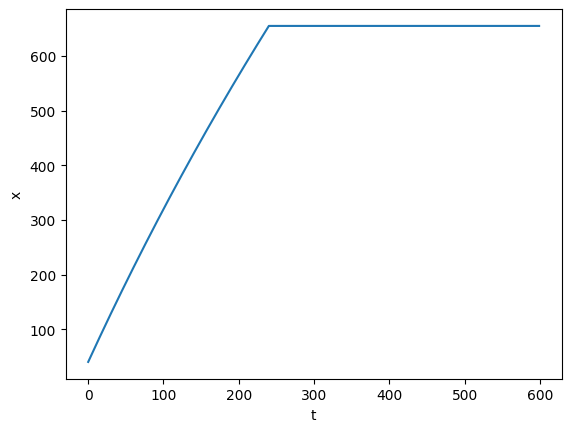

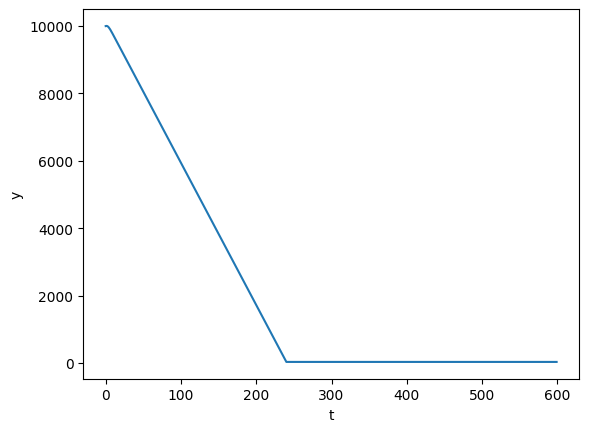

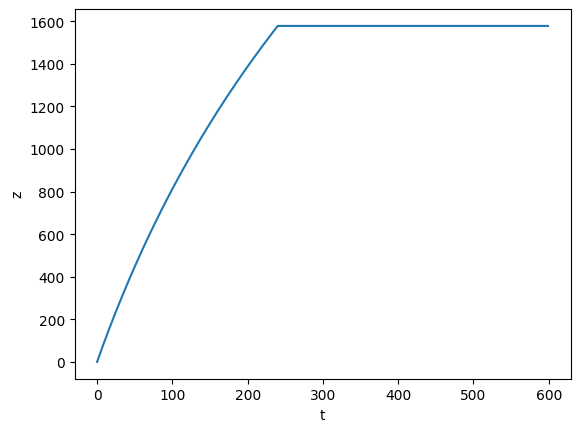

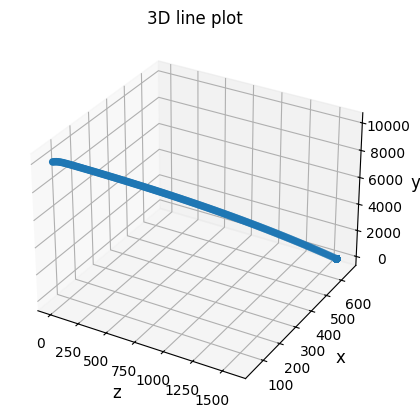

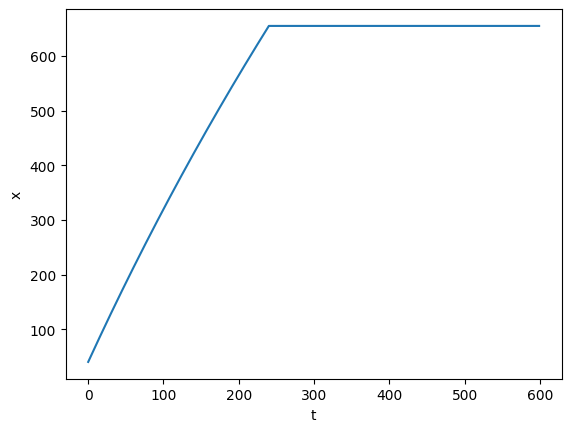

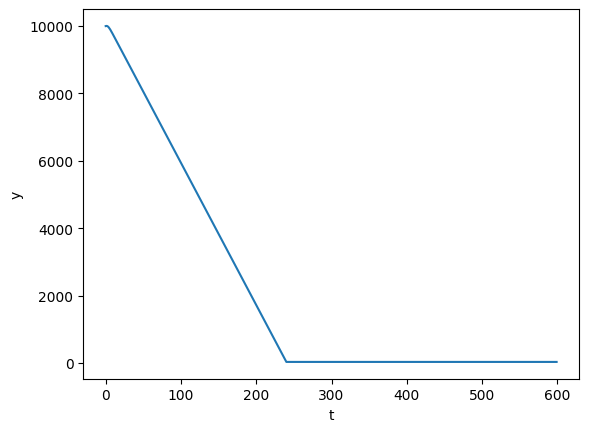

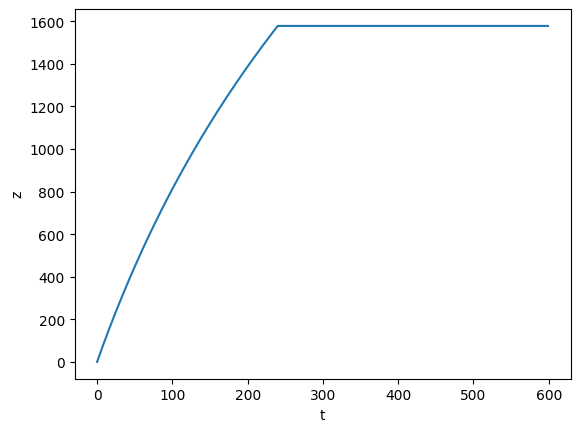

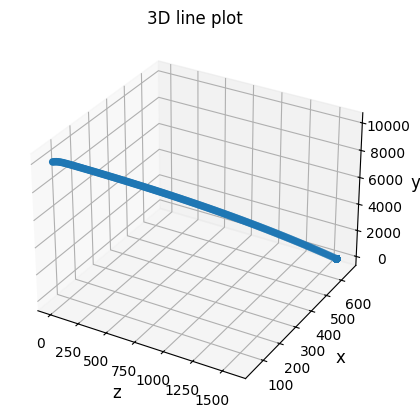

In [9]:
positions_1 = pred_pos(10*60, [0,1e3,10], [1, 2, 3])
positions_2 = pred_pos(10*60, [0,1e3,-10], [1, 2, -3])
plot_traj(positions_1, 10*60)
plot_traj(positions_2, 10*60)

In [10]:
#A function that states the distance between two planes and does for multiple points in time.
#inputs: positions_1 and positions_2 total time
#outputs: distance between positions_1 and positions_2
def dist(positions_1, positions_2, Time):
    dist = []
    for i in range(0, Time):
        dist.append(np.sqrt((positions_2[0][i]-positions_1[0][i])**2 + (positions_2[1][i]-positions_1[1][i])**2 + (positions_2[2][i]-positions_1[2][i])**2))
    return dist

In [11]:
Time = 600
dist_list = dist(positions_1, positions_2, Time)
print(dist_list)

[array([20.]), array([26.]), array([31.991]), array([37.97302698]), array([43.9461078]), array([49.91026919]), array([55.86553778]), array([61.81194006]), array([67.74950242]), array([73.67825112]), array([79.5982123]), array([85.509412]), array([91.41187612]), array([97.30563048]), array([103.19070075]), array([109.0671125]), array([114.93489121]), array([120.7940622]), array([126.64465073]), array([132.48668191]), array([138.32018075]), array([144.14517217]), array([149.96168096]), array([155.7697318]), array([161.56934929]), array([167.36055788]), array([173.14338194]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array([178.91784574]), array(

In [12]:
#detect when the distance between two planes is too small
#inputs: distance between the two planes, threshold value we want the distance to be greater than.
#outputs: true or false
def distdetector(plane_dist, thresholdvalue):
    if plane_dist < thresholdvalue:
        return False
    else:
        return True

In [15]:
safe = distdetector(dist_list[0],1000)
print(safe)

True


In [ ]:
#predict the trajectories of two planes and see if at any point they are at an unsafe distance and they will give directions to planes for arrival
#inputs: time in seconds, position(XYZ), velocity(XYZ), threshold value we want the distance to be greater than.
#outputs: